# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [328]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt # for the datestamp on the output
import json
from pprint import pprint
import seaborn as sb


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [329]:
# List for holding coordinates(lat and longs) and cities
coordinates = []
cities = []
country = []
latitud = []
longitude = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
longs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
coordinates = zip(lats, longs)

# Identify nearest city for each lat, lng combination
for coord in coordinates:
    #lats,longs= coord
    city = citipy.nearest_city(coord[0], coord[1])
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city.city_name)
        country.append(city.country_code)
        latitud.append(coord[0])
        longitude.append(coord[1])

# Print the city count to confirm sufficient count
print("Cities", len(cities))
print("Country", len(country))
print("Lats", len(latitud))
print("Longs", len(longitude))

Cities 1500
Country 1500
Lats 1500
Longs 1500


In [330]:
# Creting the DataFrame with the nearest cities from the random coordinates 
city_dict={
    "Latitud":latitud,"Longitude":longitude,"City":cities,"Country":country}

cities_df= pd.DataFrame.from_dict(city_dict,orient='index').transpose()
cities_df


,Latitud,Longitude,City,Country
0,-14.589966,-144.777841,tautira,pf
1,-7.237294,-63.728617,humaita,br
2,36.785955,49.597776,rudbar,ir
3,52.969578,-159.925765,bethel,us
4,-24.03588,-136.427197,rikitea,pf
...,...,...,...,...
1495,-80.417957,120.423674,albany,au
1496,32.694868,34.989381,tirat karmel,il
1497,-85.346938,-104.986717,punta arenas,cl
1498,74.205401,-97.701992,thompson,ca


In [331]:
cities_clean = cities_df.drop_duplicates("City",keep="first")
cities_clean

,Latitud,Longitude,City,Country
0,-14.589966,-144.777841,tautira,pf
1,-7.237294,-63.728617,humaita,br
2,36.785955,49.597776,rudbar,ir
3,52.969578,-159.925765,bethel,us
4,-24.03588,-136.427197,rikitea,pf
...,...,...,...,...
1480,37.367601,62.916154,murgab,tm
1481,-20.373463,-47.320977,franca,br
1489,51.850014,98.598229,orlik,ru
1492,57.6061,33.280656,valday,ru


In [332]:
# Reindex DataFrame
cities_clean= cities_clean.reset_index(drop=True)
len(cities_clean)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [333]:
#Weather information, saving config information

# New URL "api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}"

url_current = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Set lists to replace latitud and longitude for nearest city to actual coordinates of city
actual_lat = []
actual_long = []

# Setting new weather parameters to retrieve

maxTemp = []
humidity = []
cloudiness = []
windSpeed = []
infoDate = []
city_success = []

# Variables used in the for loop for printings
# Printing the number of record 
num_record = 0
# Printing the number of set starting from 1 changing the number of sets
num_set = 1
# Printing the name of the current city
city_curr= []
country_success =[]

# Printing first message of retrieval of data
print('''Beginning Data Retrieval     
-----------------------------''')

# Looping through all the cities for weather information retrieving
for index,row in cities_clean.iterrows():
    curr_city= row["City"]
    curr_country= row["Country"]
      
# Build query URL
    query_url =f"{url_current}q={curr_city},{curr_country}&units={units}&appid={weather_api_key}"
               
                
    response= requests.get(query_url).json()
    #print(response)
# Creating Exceptions to continue runnig the code
    num_record = num_record + 1
    try:
        actual_lat.append(response["coord"]["lat"])
        actual_long.append(response["coord"]["lon"])
        maxTemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        windSpeed.append(response["wind"]["speed"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        infoDate.append(response["dt"])
        city_success.append(curr_city)
        country_success.append(curr_country)
        
        # Integrating the information retrieved
       
        
        print(f"Processing Record {num_record} of Set {num_set}| {curr_city}")
        
    except:
        #actual_lat.append(np.nan)
        #actual_long.append(np.nan)
        #maxTemp.append(np.nan)
        #humidity.append(np.nan)
        #windSpeed.append(np.nan)
        #cloudiness.append(np.nan)
        #infoDate.append(np.nan)
        print(f"City not found. Skipping...")
        
        if num_record == 35:
            num_set = num_set+1
            num_record = 0
            # Time between them
            time.sleep(6)
            
    #if index == 5:
     #   break
            
print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1| tautira
Processing Record 2 of Set 1| humaita
City not found. Skipping...
Processing Record 4 of Set 1| bethel
Processing Record 5 of Set 1| rikitea
Processing Record 6 of Set 1| cayenne
Processing Record 7 of Set 1| saint-georges
Processing Record 8 of Set 1| castro
Processing Record 9 of Set 1| cape town
Processing Record 10 of Set 1| hilo
Processing Record 11 of Set 1| alofi
Processing Record 12 of Set 1| kargalinskaya
Processing Record 13 of Set 1| vestmannaeyjar
Processing Record 14 of Set 1| ushuaia
Processing Record 15 of Set 1| chuy
Processing Record 16 of Set 1| tasiilaq
Processing Record 17 of Set 1| lompoc
Processing Record 18 of Set 1| jamestown
Processing Record 19 of Set 1| trinidad
City not found. Skipping...
Processing Record 21 of Set 1| tongren
Processing Record 22 of Set 1| manggar
Processing Record 23 of Set 1| new norfolk
Processing Record 24 of Set 1| jiuquan
Processing Recor

Processing Record 209 of Set 1| goundam
Processing Record 210 of Set 1| xam nua
Processing Record 211 of Set 1| batagay-alyta
Processing Record 212 of Set 1| turukhansk
Processing Record 213 of Set 1| broome
Processing Record 214 of Set 1| yomou
Processing Record 215 of Set 1| barsovo
Processing Record 216 of Set 1| honiara
Processing Record 217 of Set 1| fortuna
Processing Record 218 of Set 1| acapulco
Processing Record 219 of Set 1| wonthaggi
Processing Record 220 of Set 1| armacao de pera
Processing Record 221 of Set 1| mattru
Processing Record 222 of Set 1| brae
Processing Record 223 of Set 1| cairns
Processing Record 224 of Set 1| russellville
Processing Record 225 of Set 1| quelimane
Processing Record 226 of Set 1| mancora
Processing Record 227 of Set 1| kamenka
Processing Record 228 of Set 1| longyearbyen
Processing Record 229 of Set 1| senador jose porfirio
Processing Record 230 of Set 1| bairiki
Processing Record 231 of Set 1| yar-sale
Processing Record 232 of Set 1| lavrentiy

Processing Record 415 of Set 1| plettenberg bay
Processing Record 416 of Set 1| schruns
Processing Record 417 of Set 1| bathsheba
Processing Record 418 of Set 1| norman wells
Processing Record 419 of Set 1| miri
Processing Record 420 of Set 1| dzilam gonzalez
City not found. Skipping...
Processing Record 422 of Set 1| inverell
Processing Record 423 of Set 1| bilibino
City not found. Skipping...
Processing Record 425 of Set 1| salym
Processing Record 426 of Set 1| sola
Processing Record 427 of Set 1| portland
Processing Record 428 of Set 1| bowen
Processing Record 429 of Set 1| vila velha
Processing Record 430 of Set 1| antequera
City not found. Skipping...
Processing Record 432 of Set 1| sungaipenuh
Processing Record 433 of Set 1| beyneu
Processing Record 434 of Set 1| tsevie
Processing Record 435 of Set 1| la asuncion
Processing Record 436 of Set 1| le port
Processing Record 437 of Set 1| baoying
Processing Record 438 of Set 1| hervey bay
Processing Record 439 of Set 1| koster
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [334]:
# Print the city count to confirm sufficient count
print("City", len(city_success))
print("Lat", len(actual_lat))
print("Lng", len(actual_long))
print("Max Temp", len(maxTemp))
print("Humidity", len(humidity))
print("Cloudiness", len(cloudiness))
print("Wind Speed", len(windSpeed))
print("Country", len(country_success))
print("Date", len(infoDate))


City 553
Lat 553
Lng 553
Max Temp 553
Humidity 553
Cloudiness 553
Wind Speed 553
Country 553
Date 553


In [335]:
# Display the DataFrame
cities_weather_df= pd.DataFrame({"City":city_success,"Lat":actual_lat,"Lng":actual_long,"Max Temp":maxTemp,
                                 "Humidity":humidity,"Cloudiness":cloudiness,"Wind Speed":windSpeed,
                                 "Country":country_success,"Date":infoDate})

In [336]:
# Save dataframe in output_data file. Export the city data into a .csv.

cities_weather_df.to_csv("output_data/weather_city_data.csv", index=False, header=True)


In [337]:
cities_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tautira,-17.7333,-149.1500,89.60,58,40,4.61,pf,1619747284
1,humaita,-7.5061,-63.0208,73.54,97,100,2.64,br,1619747302
2,bethel,41.3712,-73.4140,68.00,77,75,5.75,us,1619747071
3,rikitea,-23.1203,-134.9692,76.78,66,87,12.68,pf,1619747022
4,cayenne,4.9333,-52.3333,77.00,94,0,4.29,gf,1619747303
...,...,...,...,...,...,...,...,...,...
548,murgab,37.4966,61.9714,66.20,77,90,9.22,tm,1619747430
549,franca,-20.5386,-47.4008,58.33,61,99,5.32,br,1619747517
550,orlik,52.5178,99.8250,35.91,60,100,4.14,ru,1619747517
551,valday,57.9747,33.2525,34.84,94,100,3.62,ru,1619747517


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [338]:
stats = cities_weather_df.describe()
stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,18.942417,24.385181,61.824467,70.300181,52.587703,7.230470,1.619747e+09
std,34.251668,91.693623,18.700019,21.038447,39.796766,4.884144,9.692236e+01
min,-54.800000,-175.200000,7.140000,7.000000,0.000000,0.200000,1.619747e+09
25%,-9.433300,-55.048200,46.400000,60.000000,11.000000,3.440000,1.619747e+09
50%,20.931000,29.653600,66.200000,73.000000,59.000000,5.840000,1.619747e+09
75%,49.883400,108.320000,77.000000,86.000000,94.000000,9.570000,1.619747e+09
max,78.218600,179.316700,93.990000,100.000000,100.000000,29.210000,1.619748e+09


In [339]:
cities_weather_df.value_counts()

City        Lat       Lng        Max Temp  Humidity  Cloudiness  Wind Speed  Country  Date      
abu dhabi    24.4667   54.3667   86.00     48        0           2.30        ae       1619747410    1
pestravka    52.4050   49.9583   42.35     73        13          5.12        ru       1619747424    1
palora      -1.7000   -77.9333   65.44     98        93          2.01        ec       1619747460    1
palu        -0.8917    119.8707  89.69     57        26          1.57        id       1619747423    1
pandan       14.0453   124.1694  82.33     65        99          2.84        ph       1619747434    1
                                                                                                   ..
hastings    -39.6381   176.8492  66.00     68        0           4.00        nz       1619747435    1
hasaki       35.7333   140.8333  75.00     43        20          6.91        jp       1619747346    1
harlingen    53.1748   5.4224    44.60     93        75          6.91        nl       1

In [340]:
#  Get the indices of cities that have humidity over 100%.
hum = cities_weather_df.loc[(cities_weather_df["Humidity"] > 100),:]


In [341]:
# No citis with Humidity > 100
print(hum)

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []


In [342]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_weather_df.drop_duplicates("City",keep="first")
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tautira,-17.7333,-149.1500,89.60,58,40,4.61,pf,1619747284
1,humaita,-7.5061,-63.0208,73.54,97,100,2.64,br,1619747302
2,bethel,41.3712,-73.4140,68.00,77,75,5.75,us,1619747071
3,rikitea,-23.1203,-134.9692,76.78,66,87,12.68,pf,1619747022
4,cayenne,4.9333,-52.3333,77.00,94,0,4.29,gf,1619747303
...,...,...,...,...,...,...,...,...,...
548,murgab,37.4966,61.9714,66.20,77,90,9.22,tm,1619747430
549,franca,-20.5386,-47.4008,58.33,61,99,5.32,br,1619747517
550,orlik,52.5178,99.8250,35.91,60,100,4.14,ru,1619747517
551,valday,57.9747,33.2525,34.84,94,100,3.62,ru,1619747517


In [343]:
clean_city_data.reset_index()


,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,tautira,-17.7333,-149.1500,89.60,58,40,4.61,pf,1619747284
1,1,humaita,-7.5061,-63.0208,73.54,97,100,2.64,br,1619747302
2,2,bethel,41.3712,-73.4140,68.00,77,75,5.75,us,1619747071
3,3,rikitea,-23.1203,-134.9692,76.78,66,87,12.68,pf,1619747022
4,4,cayenne,4.9333,-52.3333,77.00,94,0,4.29,gf,1619747303
...,...,...,...,...,...,...,...,...,...,...
548,548,murgab,37.4966,61.9714,66.20,77,90,9.22,tm,1619747430
549,549,franca,-20.5386,-47.4008,58.33,61,99,5.32,br,1619747517
550,550,orlik,52.5178,99.8250,35.91,60,100,4.14,ru,1619747517
551,551,valday,57.9747,33.2525,34.84,94,100,3.62,ru,1619747517


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

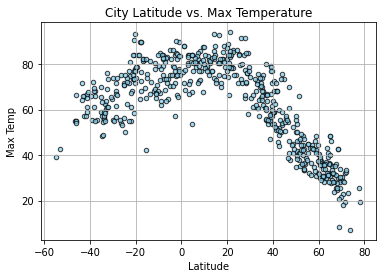

In [369]:
# Create a scatter plot which compares MPG to horsepower
clean_city_data.plot(kind="scatter", x="Lat", y="Max Temp", color="skyblue", alpha=0.75, edgecolors = "black")
plt.title("City Latitude vs. Max Temperature")
plt.grid (b=True, which="major",axis="both",linestyle="-") 
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("Figures/Fig-1_Latitude_vs_Max Temp.png")
plt.show()



## Latitude vs. Temperature Plot
Shows that the lower the latitud the greater the themperature. Therefore, the Max Temperature from 80 to 100 ºF correlates to a latitude between -40 to -20. On the contrary, the a latitude of 80 corresponds to a temperature of reoughly 9 ºF.

## Latitude vs. Humidity Plot

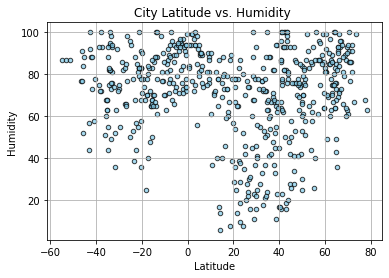

In [312]:
clean_city_data.plot(kind="scatter", x="Lat", y="Humidity", color="skyblue", alpha=0.75, edgecolors = "black",
              title="City Latitude vs. Humidity ")
plt.grid (b=True, which="major",axis="both",linestyle="-")  
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Figures/Fig-2_Latitude_vs_Humidity.png")
plt.show()



## Latitude vs. Temperature Plot
The graph shows the relationship between the latitud and the humidity. The highest humidity of 100% seems along a latitude from -50 to 70. However, the a latitude of 20 corresponds to a humidity of almost 2%.

## Latitude vs. Cloudiness Plot

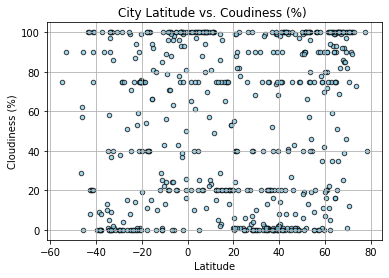

In [352]:
clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness", color="skyblue", alpha=0.75, edgecolors = "black",
              title="City Latitude vs. Coudiness (%) ")
plt.grid (b=True, which="major",axis="both",linestyle="-")  
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Figures/Fig-3_Latitude_vs_Cloudiness.png")

plt.show()



## Latitude vs. Temperature Plot
The graph shows the relationship between the latitud and cloudiness. The highest cloudiness concentrates around -40 to -20 and 20 to 60 with extrem of 100% and absence of clouds.

## Latitude vs. Wind Speed Plot

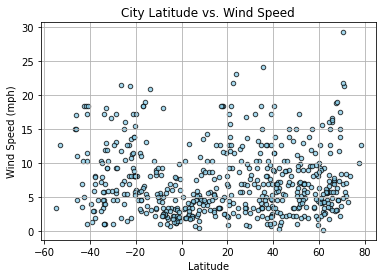

In [353]:
clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed", color="skyblue", alpha=0.75, edgecolors = "black",
              title="City Latitude vs. Wind Speed ")
plt.grid (b=True, which="major",axis="both",linestyle="-")  

plt.title(f"City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True, which="major",axis="both",linestyle="-") 
plt.savefig("Figures/Fig-4_Latitude_vs_Wind Speed.jpg")
plt.show()



## Latitude vs. Wind Speed Plot
The graph shows the relationship between the latitud and wind speed. The highest the wind speed, the higher the latitud. The highest wind speed between 25 to 30 (mph) locates around 40 and 75 latitude respectively.

## Linear Regression

In [354]:
# Using the fucntion .loc to filter the values < or > than 0. Important, use the original DF, otherwise not possible to do it.

Northern_Hemisphere = cities_weather_df.loc[cities_weather_df["Lat"] > 0]

Southern_Hemisphere = cities_weather_df.loc[cities_weather_df["Lat"] < 0]

In [355]:
Northern_Hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,bethel,41.3712,-73.4140,68.00,77,75,5.75,us,1619747071
4,cayenne,4.9333,-52.3333,77.00,94,0,4.29,gf,1619747303
5,saint-georges,3.9000,-51.8000,72.70,98,100,1.90,gf,1619747303
8,hilo,19.7297,-155.0900,82.40,57,1,8.05,us,1619747305
10,kargalinskaya,43.7417,46.4792,53.29,83,99,4.63,ru,1619747305
...,...,...,...,...,...,...,...,...,...
547,tezu,27.9167,96.1667,91.42,23,100,2.86,in,1619747221
548,murgab,37.4966,61.9714,66.20,77,90,9.22,tm,1619747430
550,orlik,52.5178,99.8250,35.91,60,100,4.14,ru,1619747517
551,valday,57.9747,33.2525,34.84,94,100,3.62,ru,1619747517


In [356]:
Southern_Hemisphere 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tautira,-17.7333,-149.1500,89.60,58,40,4.61,pf,1619747284
1,humaita,-7.5061,-63.0208,73.54,97,100,2.64,br,1619747302
3,rikitea,-23.1203,-134.9692,76.78,66,87,12.68,pf,1619747022
6,castro,-42.4721,-73.7732,57.00,94,20,18.41,cl,1619747304
7,cape town,-33.9258,18.4232,59.00,93,0,5.75,za,1619747068
...,...,...,...,...,...,...,...,...,...
535,srandakan,-7.9386,110.2506,82.60,71,71,2.26,id,1619747512
538,olinda,-8.0089,-34.8553,75.20,83,20,3.44,br,1619747514
542,kamina,-8.7386,24.9906,63.95,94,96,2.19,cd,1619747515
545,luganville,-15.5333,167.1667,82.20,64,94,13.13,vu,1619747516


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [357]:
### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8219283958121933


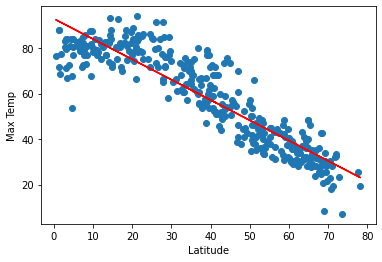

In [358]:
# Add the linear regression equation and line to plot
# Print out the r-squared value along with the plot.
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Figures/Fig-5_NortHemphere_Latitude_vs_Wind Speed_ LinearRegression.png")
plt.show()



## Northern Hemisphere - Max Temp vs. Latitude Linear Regression
The linear regression shows that the higher the latitude the lower the temperature and the lower the latitude the higher the temperature. This demosntrtes that the closer to the equator the higher the temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [359]:
### Southern Hemisphere- Max Temp vs. Latitude Linear Regression

The r-squared is: 0.37781046752295333


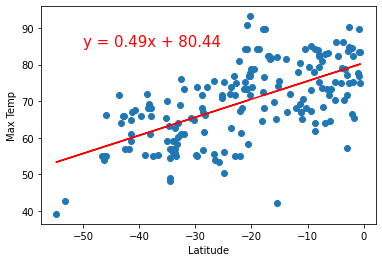

In [360]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Figures/Fig-6_SouthHemphere_Latitude_vs_MaxTemp_ LinearRegression.png")

plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.018372527280875538


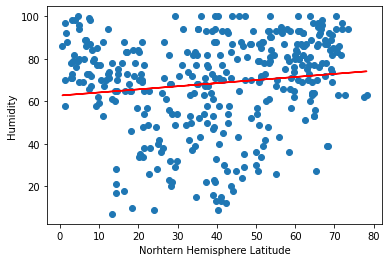

In [361]:
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Norhtern Hemisphere Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Figures/Fig-7_NortHemphere_Latitude_vs_Humidity_ LinearRegression.png")

plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04413583565653201


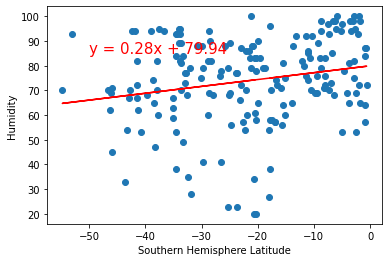

In [362]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Figures/Fig-8_SouthHemphere_Latitude_vs_Humidity_ LinearRegression.png")

plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.021069628560323652


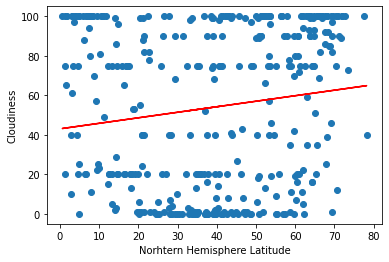

In [363]:
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Norhtern Hemisphere Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Figures/Fig-9_NortHemphere_Latitude_vs_Cloudiness_ LinearRegression.png")

plt.show()



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04121531200454258


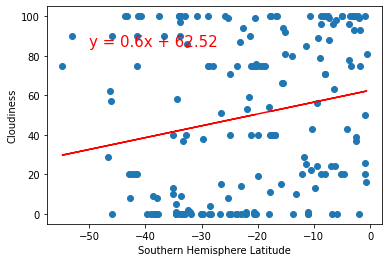

In [364]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Figures/Fig-10_SouthHemphere_Latitude_vs_Cloudiness_ LinearRegression.png")
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.017805860130944966


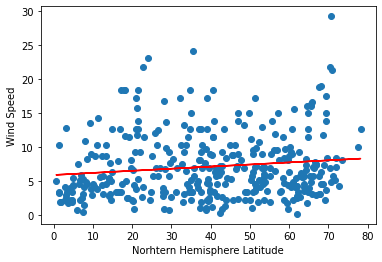

In [365]:
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Norhtern Hemisphere Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Figures/Fig-11_NortHemphere_Latitude_vs_Wind Speed_ LinearRegression.png")
plt.show()



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09858769378957631


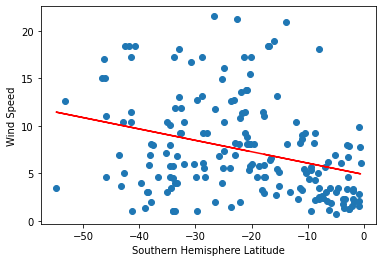

In [366]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Figures/Fig12_SouthHemphere_Latitude_vs_Wind Speed_ LinearRegression.png")
plt.show()

